In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import pandas as pd
info = pd.read_csv('./info_data.csv')

info = info[info['shape'].str.contains(r"(512, 512)")]
info

/tmp/ipykernel_21981/2027589531.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  info = info[info['shape'].str.contains(r"(512, 512)")]


,PID,label,tumorSize,tumorRatio,fileLocation,maskLocation,shape
0,103673,1.0,1434.631129,0.005508,./Image/103673_0.jpg,./Mask/103673_0.jpg,"(512, 512)"
1,MR051644C,2.0,8424.624856,0.032154,./Image/MR051644C_1.jpg,./Mask/MR051644C_1.jpg,"(512, 512)"
2,97890,3.0,1068.145540,0.004063,./Image/97890_2.jpg,./Mask/97890_2.jpg,"(512, 512)"
3,98652,3.0,798.821693,0.003017,./Image/98652_3.jpg,./Mask/98652_3.jpg,"(512, 512)"
5,112552,1.0,11759.733393,0.044910,./Image/112552_5.jpg,./Mask/112552_5.jpg,"(512, 512)"
...,...,...,...,...,...,...,...
3059,111075,3.0,1047.528099,0.003975,./Image/111075_3059.jpg,./Mask/111075_3059.jpg,"(512, 512)"
3060,107505,3.0,1214.072622,0.004662,./Image/107505_3060.jpg,./Mask/107505_3060.jpg,"(512, 512)"
3061,101029,3.0,2978.077286,0.011349,./Image/101029_3061.jpg,./Mask/101029_3061.jpg,"(512, 512)"
3062,100572,1.0,2497.626481,0.009544,./Image/100572_3062.jpg,./Mask/100572_3062.jpg,"(512, 512)"


In [3]:
from PIL import Image

def imgArr(files):
  images = list()
  for file in files:
    im = Image.open(file).convert('L')
    arr = np.asarray(im)
    images.append(arr)
  return images

In [4]:
meningioma = (np.array(imgArr(list(info[info['label'] == 1.0]['fileLocation'].head(100))))- 127.5) / 127.5
glioma =  (np.array(imgArr(list(info[info['label'] == 2.0]['fileLocation'].head(100))))- 127.5) / 127.5
pituitary =  (np.array(imgArr(list(info[info['label'] == 3.0]['fileLocation'].head(100))))- 127.5) / 127.5

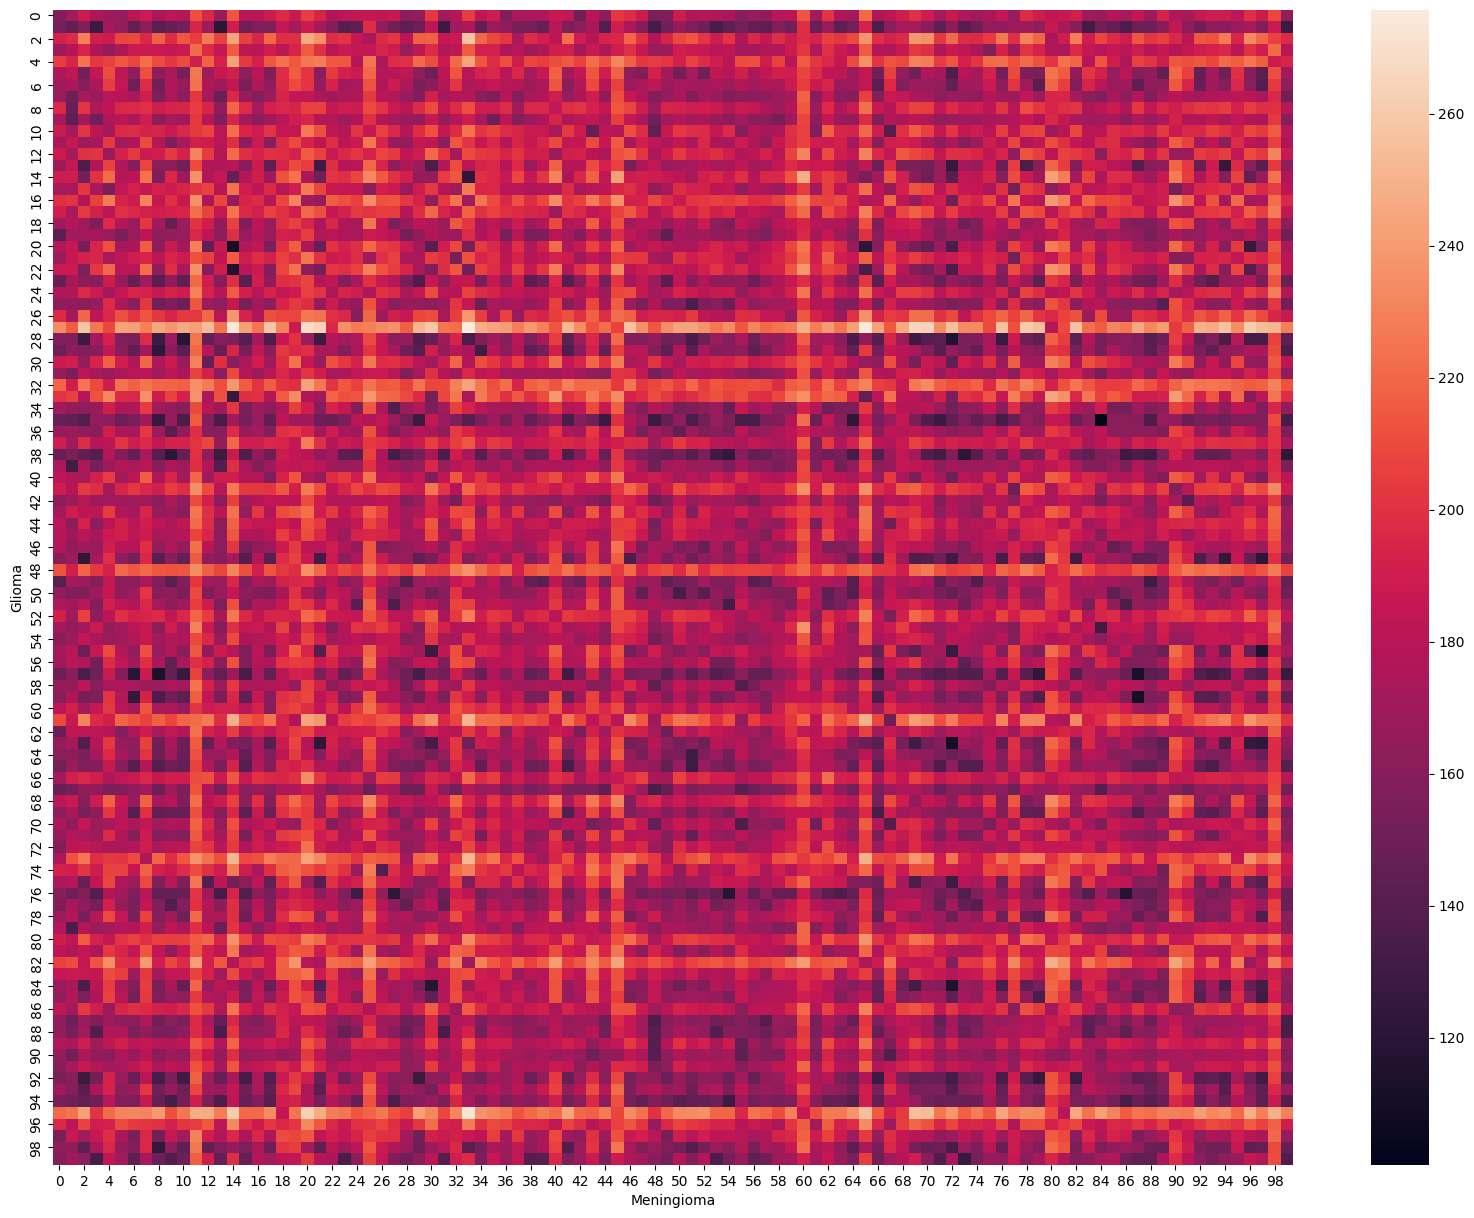

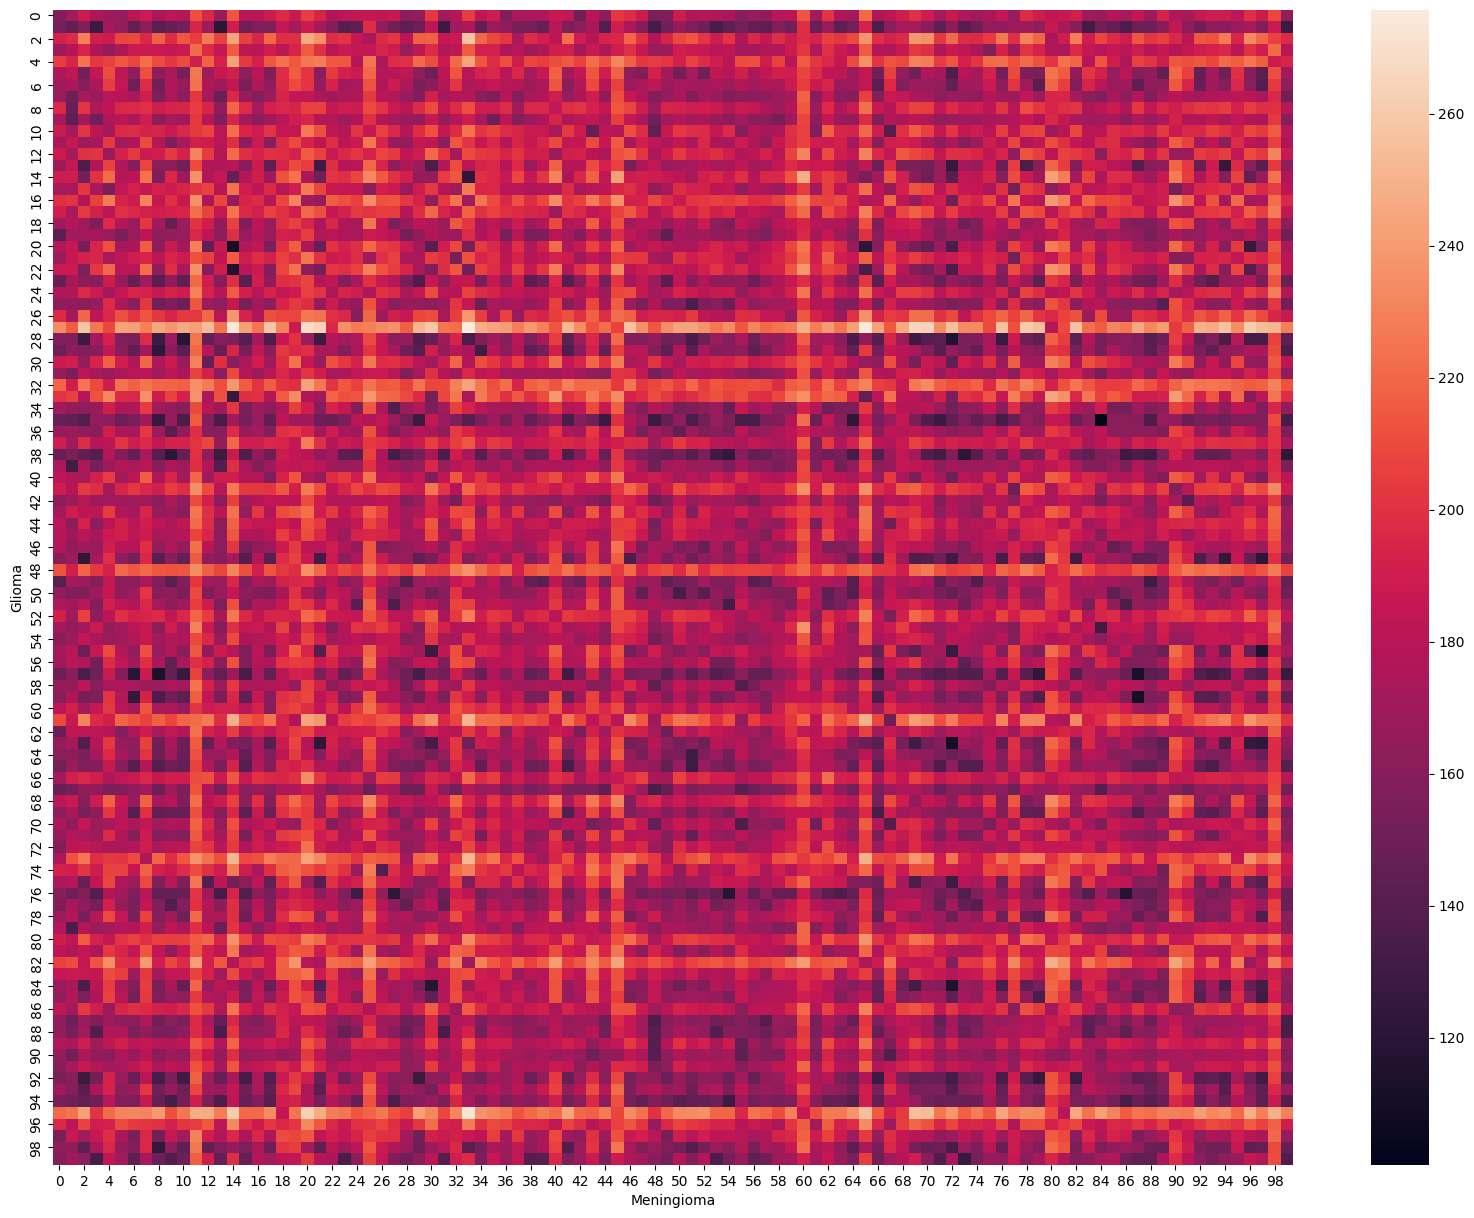

In [5]:
from scipy.spatial import distance_matrix
import seaborn as sns

lin_men = meningioma.reshape(100, meningioma.shape[1] * meningioma.shape[2])
lin_gli = glioma.reshape(100, glioma.shape[1] * glioma.shape[2])
lin_pit = pituitary.reshape(100, pituitary.shape[1] * pituitary.shape[2])
plt.figure(figsize=(20, 15))
ax = sns.heatmap(distance_matrix(lin_men, lin_gli))
ax.set(xlabel="Meningioma", ylabel="Glioma")
plt.show()

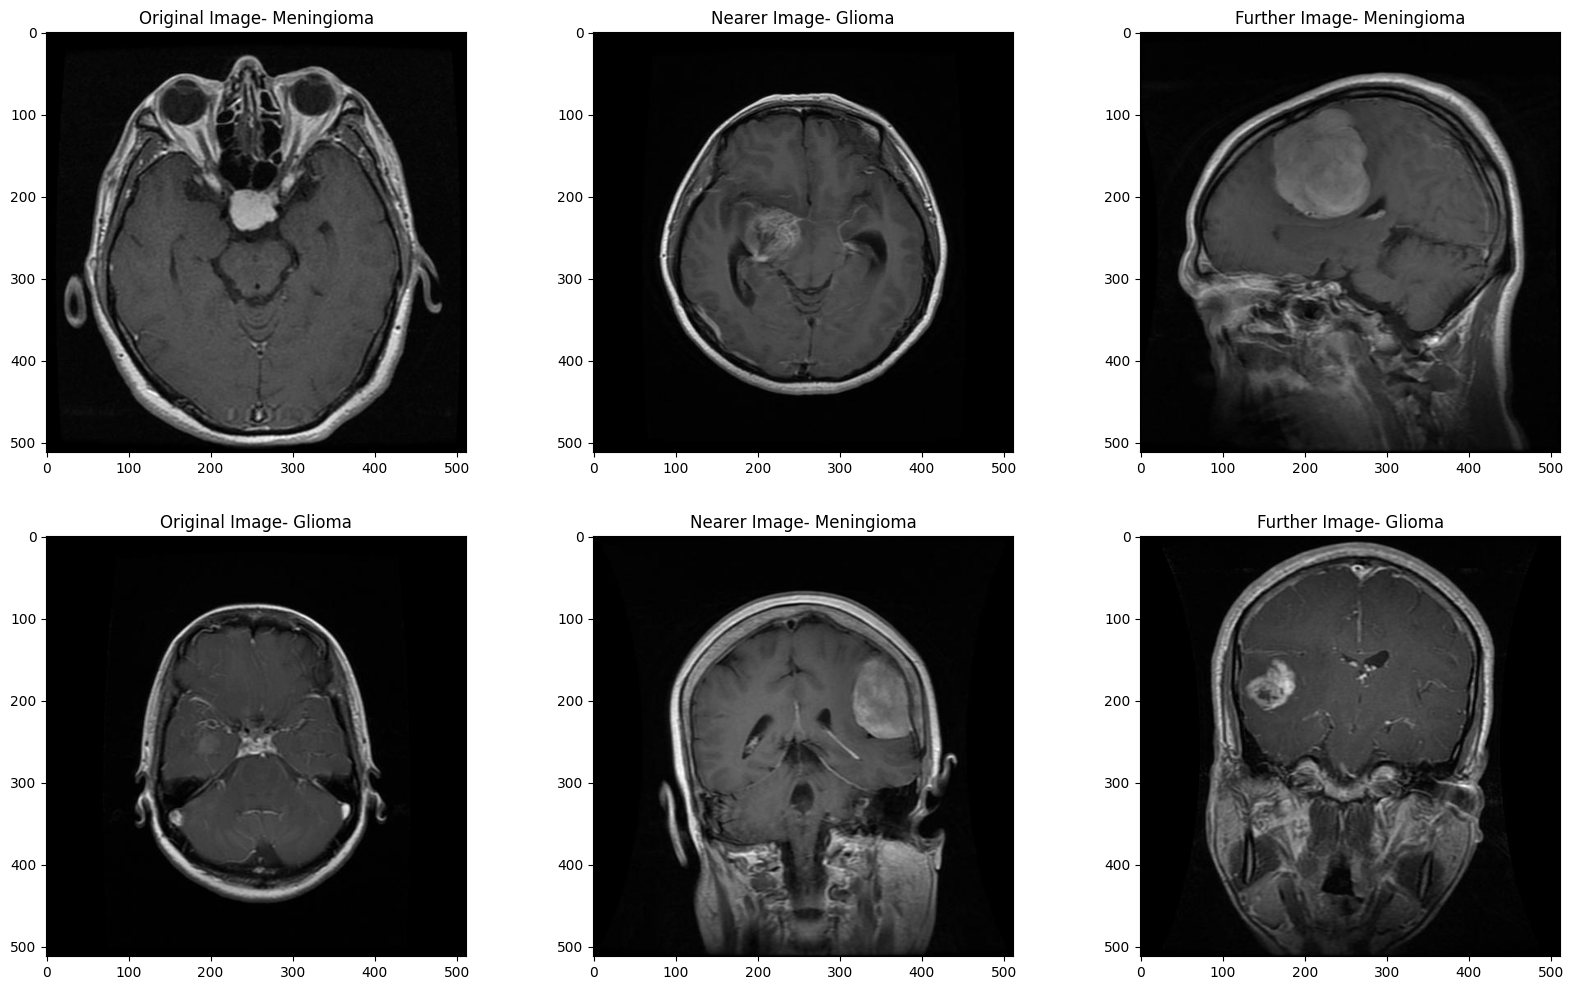

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs[0][0].imshow(meningioma[80].reshape(512, 512), cmap='gray')
axs[0][0].set_title('Original Image- Meningioma')
axs[0][1].imshow(glioma[79].reshape(512, 512), cmap='gray')
axs[0][1].set_title('Nearer Image- Glioma')
axs[0][2].imshow(meningioma[90].reshape(512, 512), cmap='gray')
axs[0][2].set_title('Further Image- Meningioma')
axs[1][0].imshow(glioma[69].reshape(512, 512), cmap='gray')
axs[1][0].set_title('Original Image- Glioma')
axs[1][1].imshow(meningioma[51].reshape(512, 512), cmap='gray')
axs[1][1].set_title('Nearer Image- Meningioma')
axs[1][2].imshow(glioma[42].reshape(512, 512), cmap='gray')
axs[1][2].set_title('Further Image- Glioma')
plt.show()

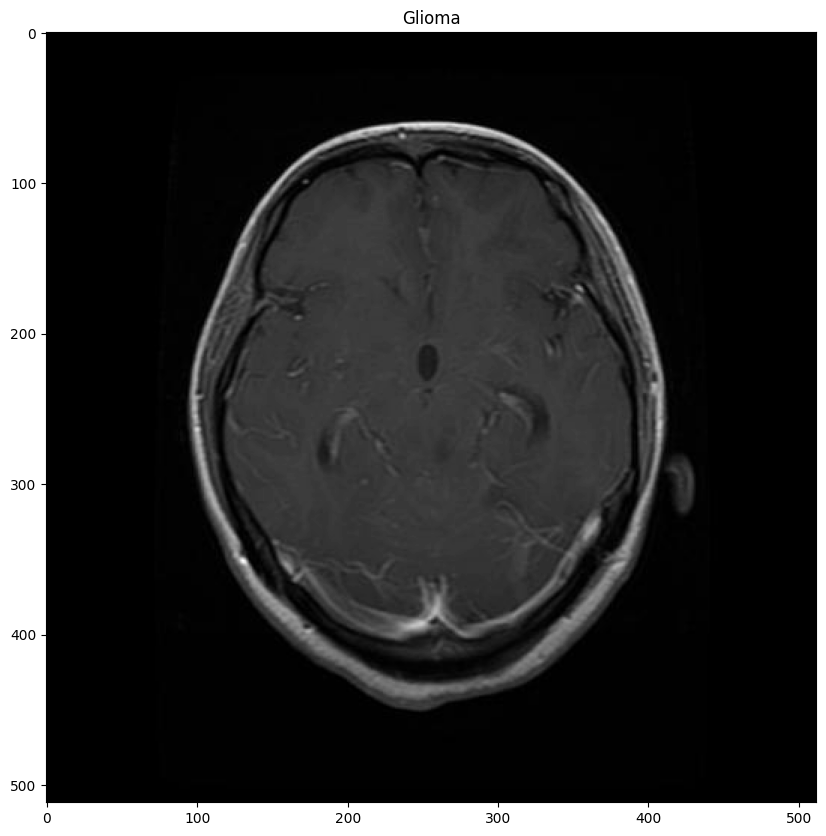

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(glioma[2], cmap='gray')
plt.title("Glioma")
plt.show()

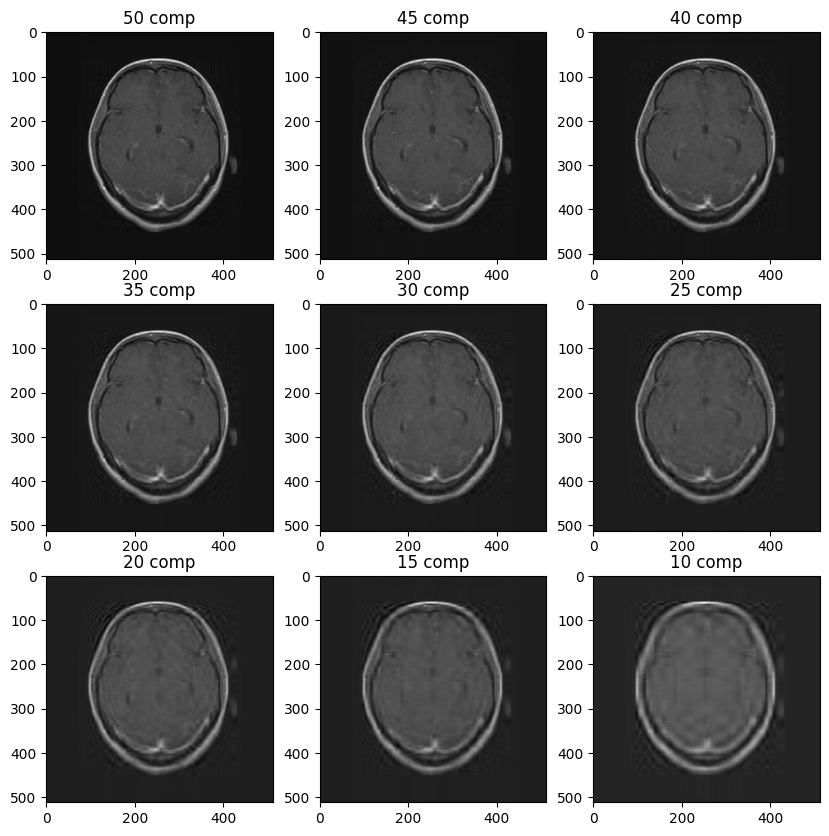

In [8]:

from sklearn.decomposition import PCA
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for index, n in enumerate(range(50, 5, -5)):
  pca = PCA(n_components=n)
  img_pca = pca.fit_transform(glioma[2])
  img_reconstructed = pca.inverse_transform(img_pca).reshape((512, 512))
  axs[index//3][index%3].imshow(img_reconstructed, cmap='gray')
  axs[index//3][index%3].set_title('{} comp'.format(n))
plt.show()

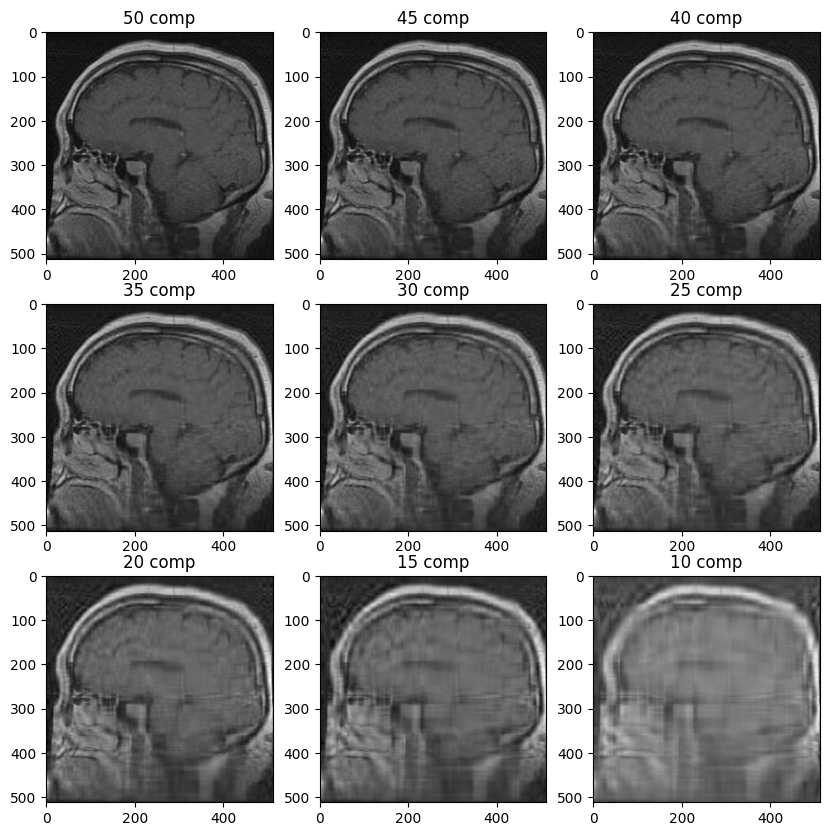

In [9]:
from sklearn.decomposition import PCA
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for index, n in enumerate(range(50, 5, -5)):
  pca = PCA(n_components=n)
  img_pca = pca.fit_transform(pituitary[17])
  img_reconstructed = pca.inverse_transform(img_pca).reshape((512, 512))
  axs[index//3][index%3].imshow(img_reconstructed, cmap='gray')
  axs[index//3][index%3].set_title('{} comp'.format(n))
plt.show()

In [10]:
pca_cans = []
for can in [lin_men, lin_gli, lin_pit]:
  pca = PCA(n_components=90)
  img_pca = pca.fit_transform(can)
  img_inv = pca.inverse_transform(img_pca)
  pca_cans.append(img_inv)

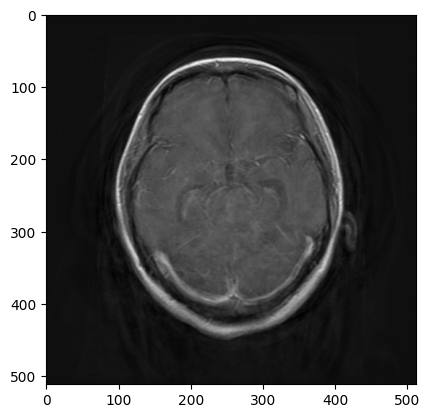

In [11]:
plt.imshow(pca_cans[1].reshape((100, 512, 512))[2], cmap='gray')
plt.show()

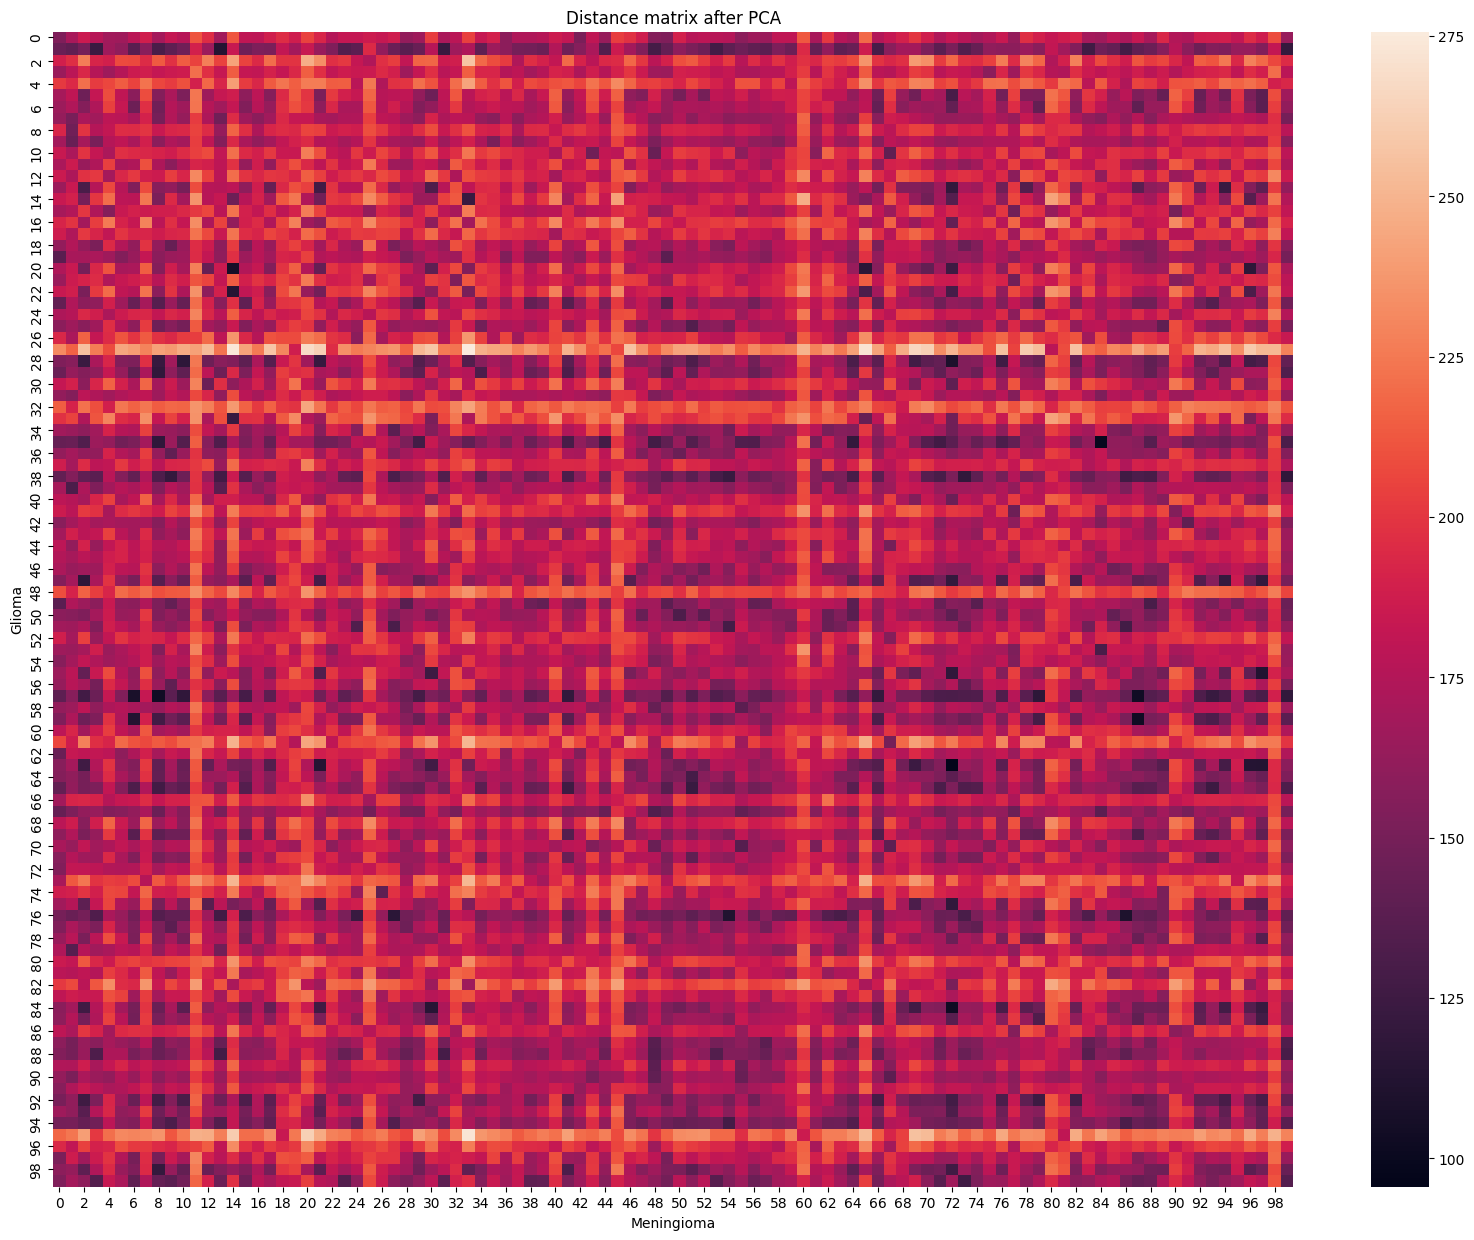

In [12]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(distance_matrix(pca_cans[0], pca_cans[1]))
ax.set(xlabel="Meningioma", ylabel="Glioma")
ax.set_title("Distance matrix after PCA")
plt.show()

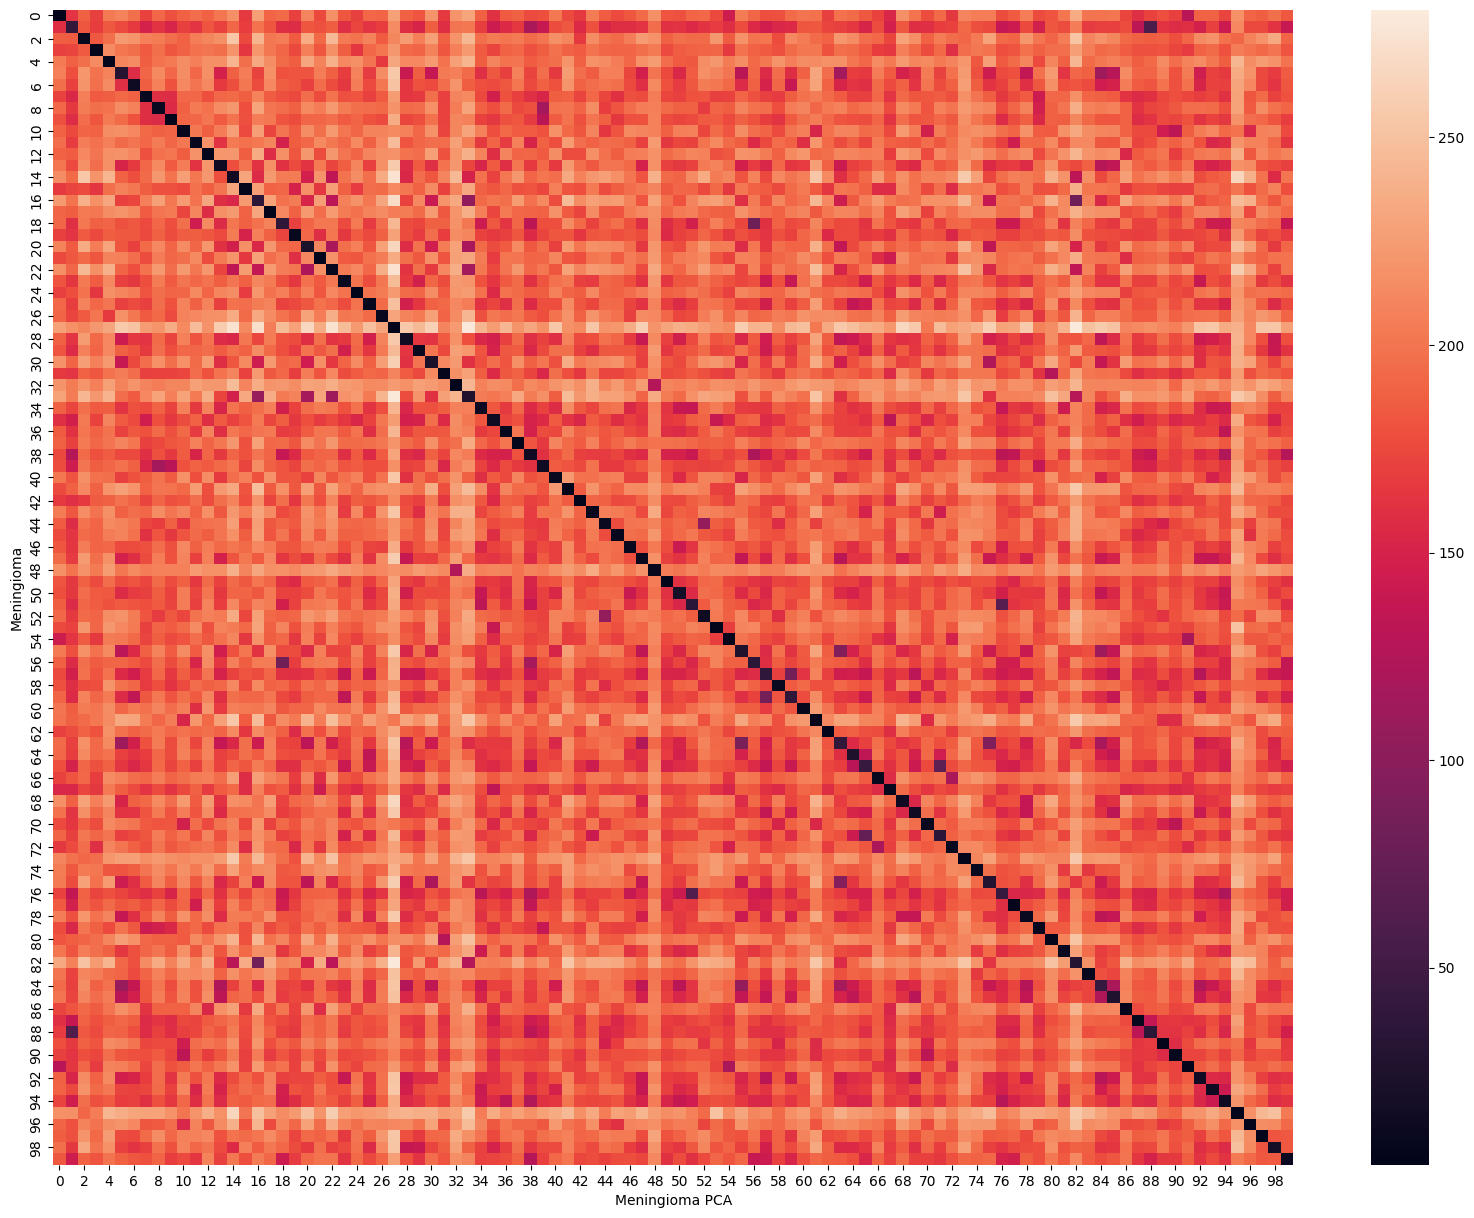

In [13]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(distance_matrix(pca_cans[0], lin_men))
ax.set(xlabel="Meningioma PCA", ylabel="Meningioma")
plt.show()

In [14]:
from scipy.stats import pearsonr
x = distance_matrix(pca_cans[0], pca_cans[1])
y = distance_matrix(lin_men, lin_gli)

In [15]:
from scipy.spatial import procrustes
mtx1, mtx2, disparity = procrustes(x, y)

In [16]:
disparity

0.004606169302630871

In [17]:
meningioma = (np.array(imgArr(list(info[info['label'] == 1.0]['fileLocation'].head(300))))- 127.5) / 127.5
glioma =  (np.array(imgArr(list(info[info['label'] == 2.0]['fileLocation'].head(300))))- 127.5) / 127.5
pituitary =  (np.array(imgArr(list(info[info['label'] == 3.0]['fileLocation'].head(300))))- 127.5) / 127.5

In [18]:
PCAimg = []
images = np.concatenate([meningioma, glioma, pituitary])
for img in images:
  pca = PCA(n_components=35)
  img_pca = pca.fit_transform(img)
  img_inv = pca.inverse_transform(img_pca)
  PCAimg.append(img_inv)

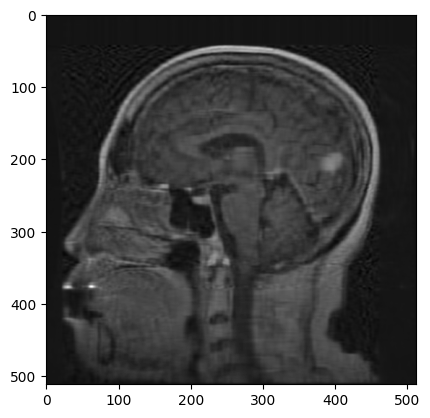

In [19]:
plt.imshow(PCAimg[35], cmap='gray')
plt.show()

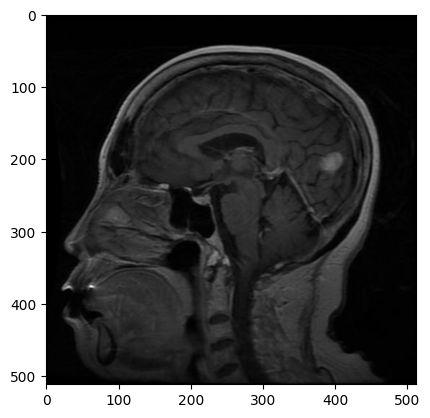

In [20]:
plt.imshow(images[35], cmap='gray')
plt.show()

In [21]:
variance_retained = np.sum(pca.explained_variance_ratio_)
print("Percentage of variance retained:", variance_retained * 100, "%")

Percentage of variance retained: 94.27345107597611 %


In [22]:
from sklearn.metrics import mean_squared_error
mse = 0
for n in range(900):
  mse += mean_squared_error(images[n], PCAimg[n])
mse /= 900
print("MSE:", mse)

MSE: 0.0021937967993322493


In [23]:
from skimage.metrics import peak_signal_noise_ratio
psnr = 0
for n in range(900):
  psnr += peak_signal_noise_ratio(images[n], PCAimg[n])
psnr /= 900
print("PSNR:", psnr)

PSNR: 33.33924387938816


In [24]:
from skimage.metrics import structural_similarity as ssim
ssim_score = 0
for n in range(900):
  ssim_score += ssim(images[n], PCAimg[n])
ssim_score /= 900
print("SSIM:", ssim_score)

SSIM: 0.8841998599988743


In [1]:
from sklearn.cluster import KMeans

flat_img = np.asarray(PCAimg).reshape(900,-1)
kmeans = KMeans(n_clusters=12, random_state=0, n_init="auto").fit(flat_img)


NameError: name 'np' is not defined

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(flat_img)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)
labels = kmeans.labels_

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.title('KMeans Clustering of Brain Tumor Images')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
actual = list(info.label.head(1000).values)

In [ ]:
arr = np.zeros((900, 1))
arr[0:300] = 1
arr[300:600] = 2
arr[600:900] = 3

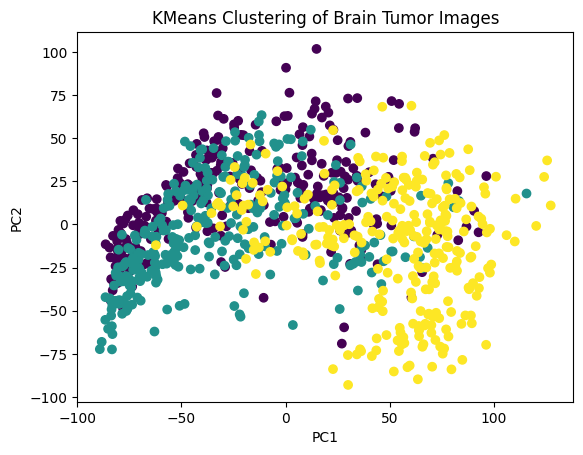

In [52]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=arr, cmap='viridis')
plt.title('Actual classes of Brain Tumor Images')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()